In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Classification problem with HWW ATLAS Open data using Machine Learning

In this exercise you are given 3 files with tabular data split by 3 sets, respectively:

 * Set of events for training the ML classifier (data_train.csv)
 * Set of events for validating the ML classifier (data_val.csv)
 * Set of events for testing the ML classifier (data_test.csv)

The data content is the same used for the ML class, i.e.

 * there is a number of observables (mLL,pTLL, etc...);
 * a label indicating the true class of each event (0=background, 1=signal) included as a variable in the data frame;
 * an event weight to be used for training ("train_weight").

## Load and inspect data

* Open data files
* Inspect contents
* Plot variables

In [2]:
data_train = pd.read_csv("https://www.lip.pt/~rute/MASimHEP/HWW_csv_prep/data_train.csv")
data_val   = pd.read_csv("https://www.lip.pt/~rute/MASimHEP/HWW_csv_prep/data_val.csv")
data_test  = pd.read_csv("https://www.lip.pt/~rute/MASimHEP/HWW_csv_prep/data_test.csv")

data_train

,Unnamed: 0,mLL,ptLL,dPhi_LL,dPhiLLmet,MET,mt,goodjet_n,goodbjet_n,Lepton1_Pt,...,Lepton2_Eta,Lepton2_E,Lepton2_Phi,Lepton2_charge,Lepton2_type,weight,process,label,scale_weight,train_weight
0,147358,49.0513,61.2491,1.381790,3.02321,67.4356,128.3110,0,0,47.4727,...,-1.721170,88.8479,-0.235791,-1,11,0.988994,diboson,0,0.024622,0.000016
1,5771,19.9963,57.7996,0.699216,2.46491,61.4980,112.4800,1,0,40.3348,...,1.846730,67.4742,2.171550,1,11,31.823900,signal,1,0.003327,0.000016
2,76660,43.8206,96.2837,0.084119,2.31188,84.7958,165.3850,1,0,61.2737,...,0.502883,39.6200,-0.597652,-1,11,25.705100,signal,1,0.002687,0.000013
3,154078,49.4911,85.4053,1.037550,2.22171,93.4773,160.1300,1,0,61.2571,...,-0.131749,36.3402,-2.929180,-1,13,0.084681,diboson,0,0.002108,0.000001
4,73055,33.0773,60.7330,1.009950,2.83851,42.6602,100.6350,1,0,40.1756,...,0.329813,30.5285,2.296100,1,11,32.887200,signal,1,0.003438,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64055,5014,44.2874,59.5597,0.489036,2.80323,39.1230,95.1650,0,0,35.7962,...,0.418980,27.8105,1.029180,1,11,0.000000,signal,1,0.000000,0.000000
64056,173819,22.4984,68.0981,0.636690,2.88861,91.2377,156.3870,0,0,42.8521,...,2.259050,138.8700,-0.802207,1,13,0.981583,diboson,0,0.024438,0.000016
64057,153656,22.7315,61.5826,0.317995,3.08785,63.8451,125.3620,0,0,38.6547,...,-2.249690,113.4920,2.326470,-1,13,1.192730,diboson,0,0.029694,0.000020
64058,187006,42.2915,55.7519,0.391131,2.96568,29.7256,81.1042,0,0,39.6714,...,-0.463672,18.8450,2.831800,-1,13,1.180240,diboson,0,0.029383,0.000020


In [3]:
features = data_train.columns
features

Index(['Unnamed: 0', 'mLL', 'ptLL', 'dPhi_LL', 'dPhiLLmet', 'MET', 'mt',
       'goodjet_n', 'goodbjet_n', 'Lepton1_Pt', 'Lepton1_Eta', 'Lepton1_E',
       'Lepton1_Phi', 'Lepton1_charge', 'Lepton1_type', 'Lepton2_Pt',
       'Lepton2_Eta', 'Lepton2_E', 'Lepton2_Phi', 'Lepton2_charge',
       'Lepton2_type', 'weight', 'process', 'label', 'scale_weight',
       'train_weight'],
      dtype='object')

In [4]:
plot_features = ['mLL', 'ptLL', 'dPhi_LL', 'dPhiLLmet', 'MET', 'mt',
                 'Lepton1_Pt', 'Lepton1_Eta', 'Lepton1_E', 'Lepton1_Phi',
                 'Lepton2_Pt', 'Lepton2_Eta', 'Lepton2_E', 'Lepton2_Phi']

# for feat in plot_features:

#     #(We are filtering data signal out of the 99% quantile to get the bulk of the distribution and obtain decent axes limits...)
#     bins = plt.hist(data_train.query(f'({feat} < {feat}.quantile(.99)) & (process=="signal")')[feat].values, bins=20, density=True, histtype='step', color='red', label='signal')
#     plt.hist(data_train.query('process=="ttbar"')[feat].values, bins=bins[1], density=True, histtype='step', color='darkorange', label='ttbar')
#     plt.hist(data_train.query('process=="diboson"')[feat].values, bins=bins[1], density=True, histtype='step', color='darkviolet', label='diboson')

#     plt.xlabel(feat)
#     plt.ylabel('Density \(a.u\)')
#     plt.legend()
#     plt.yscale("log")
#     plt.show()

## Data pre-processing for training

* Define training 'features'
* Construct the inputs (x_train,x_val), weights (w_train,w_val) and target values (y_train,y_val) to train the classifier (in this step you obtain the exact same arrays as used in the ML class)

In [5]:
train_features = ['mLL', 'ptLL', 'dPhi_LL', 'dPhiLLmet', 'MET', 'mt', 'goodjet_n',
                 'goodbjet_n', 'Lepton1_Pt', 'Lepton1_Eta', 'Lepton1_E', 'Lepton1_Phi',
                 'Lepton1_charge', 'Lepton1_type', 'Lepton2_Pt', 'Lepton2_Eta',
                 'Lepton2_E', 'Lepton2_Phi', 'Lepton2_charge', 'Lepton2_type']

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train[train_features].values)

x_train = scaler.transform(data_train[train_features].values)
y_train = data_train['label'].values
w_train = data_train['train_weight'].values

x_val = scaler.transform(data_val[train_features].values)
y_val = data_val['label'].values
w_val = data_val['train_weight'].values

x_test = scaler.transform(data_test[train_features].values)
y_test = data_test['label'].values
w_test = data_test['train_weight'].values

print(f'Train sample x {len(x_train)} events (y {len(y_train)} events)')
print(f'Val   sample x {len(x_val)} events (y {len(y_val)} events)')
print(f'Test  sample x {len(x_test)} events (y {len(y_test)} events)')

Train sample x 64060 events (y 64060 events)
Val   sample x 64060 events (y 64060 events)
Test  sample x 64060 events (y 64060 events)


# Exercise 1: DNN - Deep Neural Network Classifier


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.random.set_seed(2)

## 1.a) DNN Training

Train a DNN with the hyperparameters below:

* 3 layers with 80, 95, 70 nodes respectively
* Learning rate of 8e-4
* 100 training epochs and Early Stopping with patience 4

In [40]:
# your answer
model = Sequential()

# Input and Hidden layers

model.add(Dense(80, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(95, activation='relu'))
model.add(Dense(70, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=8e-4), weighted_metrics=['accuracy'])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 80)             │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 95)             │         7,695 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 70)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,166 (63.15 KB)

 Trainable params: 16,166 (63.15 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(x_train, y_train, sample_weight=w_train, validation_data=(x_val, y_val, w_val), epochs=100, batch_size=1024, callbacks=[EarlyStopping(patience=4)])

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5281 - loss: 7.1999e-06 - val_accuracy: 0.6222 - val_loss: 6.8389e-06
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 6.7143e-06 - val_accuracy: 0.6640 - val_loss: 6.4665e-06
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - loss: 6.3948e-06 - val_accuracy: 0.6771 - val_loss: 6.2338e-06
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 6.2098e-06 - val_accuracy: 0.6849 - val_loss: 6.1009e-06
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 6.1139e-06 - val_accuracy: 0.6889 - val_loss: 6.0307e-06
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 6.0646e-06 - val_accuracy: 0.6915 - val_loss: 5.9893e-06
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 6.0332e-06 - val_accuracy: 0.6935 - val_loss: 5.9610e-06
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

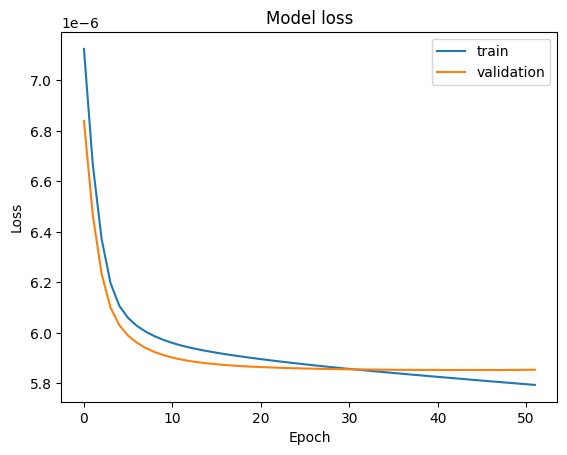

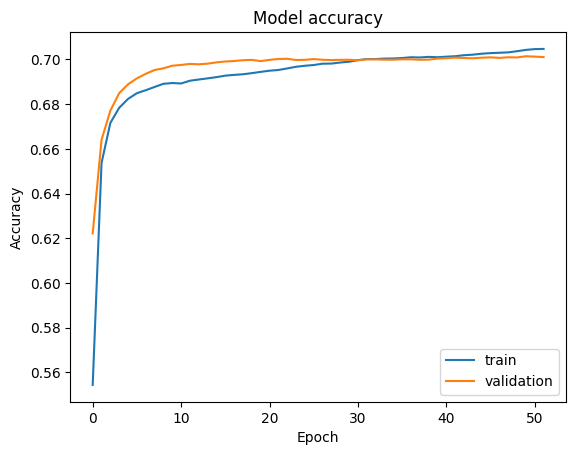

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


2002/2002 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step


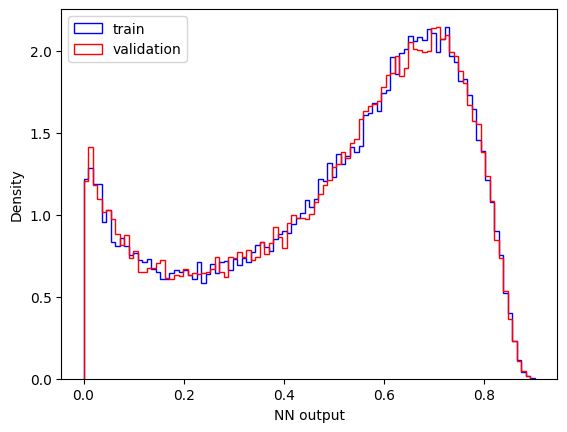

In [43]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

bin = plt.hist(y_train_pred, bins=100, density=True, histtype='step', color='blue', label='train')
plt.hist(y_val_pred, bins=bin[1], density=True, histtype='step', color='red', label='validation')

plt.xlabel('NN output')
plt.ylabel('Density')
plt.legend()

## 1.b) Evaluate the DNN

* Plot the DNN output for signal and background and the Receiver Operating Characteristic (ROC) curve.
* What is the ROC Area Under the Curve (AUC)?

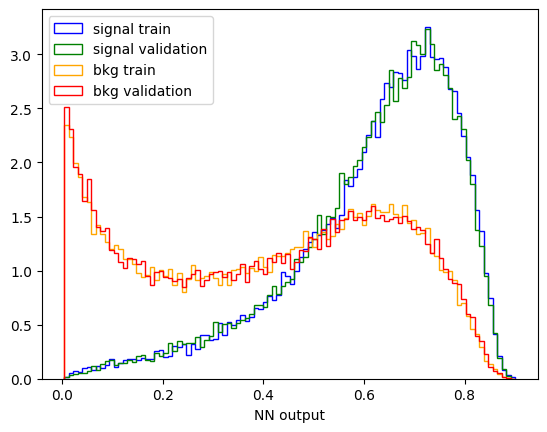

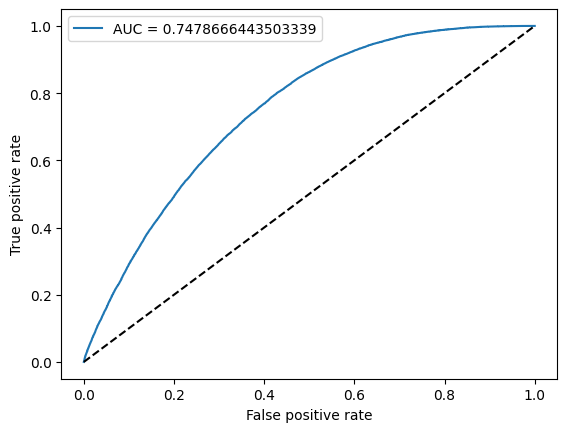

In [44]:
# your answer
bins = plt.hist(y_train_pred[y_train==1], bins=100, density=True, histtype='step', color='blue', label='signal train')
plt.hist(y_val_pred[y_val==1], bins=bins[1], density=True, histtype='step', color='green', label='signal validation')
plt.hist(y_train_pred[y_train==0], bins=bins[1], density=True, histtype='step', color='orange', label='bkg train')
plt.hist(y_val_pred[y_val==0], bins=bins[1], density=True, histtype='step', color='red', label='bkg validation')

plt.xlabel('NN output')
plt.legend()
plt.show()

# RPC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


# Exercise 2: RF - Random Forest Classifier


## 2.a) RF Training

Train a Random Forest Classifier with the hyperparameters below:

* Maximum depth of 3
* 40 decision trees (estimators)

**HINT:** The method to retreive the class prediction from the classifier for an input set of data x

```
predict_proba(x)
```
returns the probabilities of classification according to each class (0 or 1), such that

```
predict_proba(x)[:,0] # class-0 probability
predict_proba(x)[:,1] # class-1 probability
```




In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# your answer
classifier = RandomForestClassifier(max_depth=3, n_estimators = 40)
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

pred_train = classifier.predict_proba(x_train)
pred_val = classifier.predict_proba(x_val)

bkg_pred_train = pred_train[:, 0]
sig_pred_train = pred_train[:, 1]
bkg_pred_val = pred_val[:, 0]
sig_pred_val = pred_val[:,1]


## 2.b) Evaluate the RF

* Plot the classifier output for signal and background and the Receiver Operating Characteristic (ROC) curve.
* What is the ROC Area Under the Curve (AUC)?

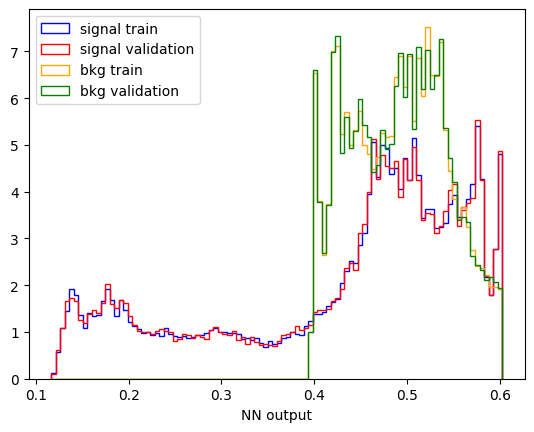

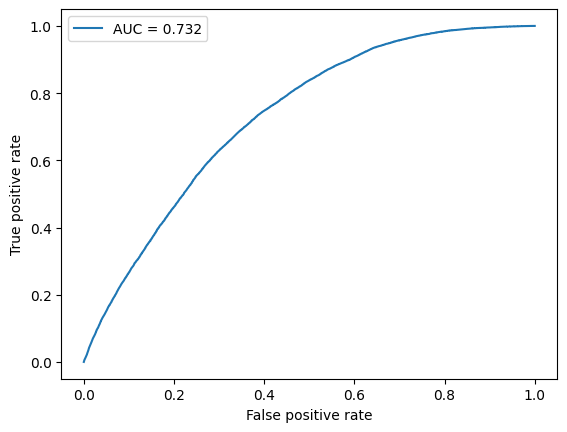

In [15]:
# your answer
# plot histograms from 0 to 1 range on x axis
bins = plt.hist(sig_pred_train, bins=100, density=True, histtype='step', color='blue', label='signal train')
plt.hist(sig_pred_val, bins=bins[1], density=True, histtype='step', color='red', label='signal validation')
plt.hist(bkg_pred_train, bins=bins[1], density=True, histtype='step', color='orange', label='bkg train')
plt.hist(bkg_pred_val, bins=bins[1], density=True, histtype='step', color='green', label='bkg validation')
# plt.xlim(0, 1)
plt.xlabel('NN output')
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_val, sig_pred_val)
auc = roc_auc_score(y_val, sig_pred_val)
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

# Exercise 3: DNN versus RF

Which method (DNN or Random Forest) has the best classification performance? Are these results in agreement with your expectations? Explain why.



Answer: